# Gap Minder data exploration project

From (https://www.gapminder.org/data/) I want to look answer the following questions:

1) Which continent has the highest average population? What's the average population trend over the years?

2) Which continent earns the most on average per person? What's the average income trend over the years?

3) Which continent has the highest life expectancy? What's the average life expectancy trend over the years?


To do this, i'll start by importing these downloaded csv files as dataframes.

## Imports

In [664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from two_lists_similarity import Calculate_Similarity as cs
import fuzzywuzzy

In [665]:
'''I want to get my dataframe such that the columns are 'country','year','val1',...,'valx' 
so i'll transform all dataframes like this'''

co2_df = pd.read_csv('co2_emissions_tonnes_per_person.csv')
co2_df = co2_df.melt(id_vars=["country"], var_name="year",value_name="co2")

In [666]:
income_df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_df = income_df.melt(id_vars=["country"], var_name="year", value_name="income")

In [667]:
energy_use_df = pd.read_csv('energy_use_per_person.csv')
energy_use_df = energy_use_df.melt(id_vars=['country'], var_name='year', value_name='energy_use')

In [668]:
out_of_school_df = pd.read_csv('children_out_of_school_primary.csv')
out_of_school_df = out_of_school_df.melt(id_vars=['country'], var_name='year', value_name='out_of_school')

In [669]:
life_expectancy_df = pd.read_csv('life_expectancy_years.csv')
life_expectancy_df = life_expectancy_df.melt(id_vars=['country'], var_name='year', value_name='life_expectancy')

In [670]:
population_df = pd.read_csv('population_total.csv')
population_df = population_df.melt(id_vars=['country'], var_name='year', value_name='population')

In [671]:
#merge dataframes
data_frames = [co2_df, income_df, energy_use_df, out_of_school_df, life_expectancy_df, population_df]
df_merged = pd.concat(data_frames)

In [754]:
df_merged.head()

,co2,country,energy_use,income,life_expectancy,out_of_school,population,year
0,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,1800
1,NaN,Albania,NaN,NaN,NaN,NaN,NaN,1800
2,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,1800
3,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,1800
4,NaN,Angola,NaN,NaN,NaN,NaN,NaN,1800


In [676]:
'''As i'm interested in grouping the data by continents i'll use this dataset that maps country to continent 
from kaggle (https://www.kaggle.com/statchaitya/country-to-continent)''' 

continent_df = pd.read_csv('countryContinent.csv', encoding='latin-1')

In [677]:
continent_df.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [678]:
continent_df.drop(columns=['code_2','code_3','country_code','iso_3166_2','region_code','sub_region_code','sub_region'],inplace=True)

It looks like the countries are the same in both the continent_df and df_merged dataframes but there isn't an exact match. An example of this is 'United Kingdom' shown as a country in merged_df however in continent_df it's displayed as 'United Kingdom of Great Britain and Northern Ireland'

If I merge as-is, i'll likely omit lots of values from my dataset. Instead of doing this, I'll use a package called fuzzywuzzy which looks at partial matches in text following this tutorial https://pypi.org/project/two-lists-similarity/ (please let me know if there's a better methodology to partial match text values)

In [544]:
x = df_merged.country.unique()
y = continent_df.country.unique()
csObj = cs(x,y)
csObj.fuzzy_match_output(output_csv_name = 'country_matches_fw.csv');


Initiating fuzzy matching.......
------------------------------------------------
Input column name : Afghanistan
Similarity Ratios when compared with the similar reference list items are as below :  [('Afghanistan', 100), ('Ghana', 72), ('Pakistan', 63), ('Spain', 60), ('Saint Helena, Ascension and Tristan da Cunha', 58)]
Associated Reference list item with highest similarity : 
('Afghanistan', 100)
------------------------------------------------
Input column name : Albania
Similarity Ratios when compared with the similar reference list items are as below :  [('Albania', 100), ('Malaysia', 67), ('Tanzania, United Republic of', 64), ('Gambia', 62), ('Lithuania', 62)]
Associated Reference list item with highest similarity : 
('Albania', 100)
------------------------------------------------
Input column name : Algeria
Similarity Ratios when compared with the similar reference list items are as below :  [('Algeria', 100), ('Georgia', 71), ('Liberia', 71), ('Nigeria', 71), ('Bulgaria', 67

In [679]:
country_matches_df = pd.read_csv('country_matches_fw.csv')

In [680]:
continent_df = continent_df.merge(country_matches_df, left_on='country',right_on='similar_ref_list_item')

In [681]:
'''I want to delete the countries where the similarity score is under 0.9 so I can be confident that they're matched. 
An example why of why i've done this can be seen with Lao which is matched with Angola with a similarity score of 0.72'''

continent_df = continent_df[continent_df.similarity_score >= 0.9]

In [682]:
continent_df.drop(columns=['country','similar_ref_list_item','similarity_score'],inplace=True)

In [683]:
continent_df

,continent,input_list_item
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
6,Americas,Antigua and Barbuda
7,Americas,Argentina
8,Asia,Armenia
9,Oceania,Australia
10,Europe,Austria


In [684]:
final_df = pd.merge(df_merged, continent_df, how='left', left_on='country', right_on='input_list_item')

In [685]:
final_df.drop(columns=['country'],inplace=True)

In [686]:
final_df.rename(columns={"input_list_item": "country"},inplace=True)


In [687]:
final_df.head()

,co2,energy_use,income,life_expectancy,out_of_school,population,year,continent,country
0,NaN,NaN,NaN,NaN,NaN,NaN,1800,Asia,Afghanistan
1,NaN,NaN,NaN,NaN,NaN,NaN,1800,Europe,Albania
2,NaN,NaN,NaN,NaN,NaN,NaN,1800,Africa,Algeria
3,NaN,NaN,NaN,NaN,NaN,NaN,1800,Europe,Andorra
4,NaN,NaN,NaN,NaN,NaN,NaN,1800,Africa,Angola


In [688]:
#validate that the countries grouped under Europe look right
final_df.loc[(final_df['continent'] == 'Europe')]['country'].drop_duplicates()

1                        Albania
3                        Andorra
9                        Austria
15                       Belarus
16                       Belgium
21        Bosnia and Herzegovina
25                      Bulgaria
42                       Croatia
45                Czech Republic
46                       Denmark
55                       Estonia
58                       Finland
59                        France
63                       Germany
65                        Greece
73                       Hungary
74                       Iceland
79                       Ireland
81                         Italy
91                        Latvia
96                 Liechtenstein
97                     Lithuania
98                    Luxembourg
104                        Malta
110                      Moldova
112                   Montenegro
119                  Netherlands
126                       Norway
136                       Poland
137                     Portugal
139       

## explore the final dataset

In [689]:
final_df.head()

,co2,energy_use,income,life_expectancy,out_of_school,population,year,continent,country
0,NaN,NaN,NaN,NaN,NaN,NaN,1800,Asia,Afghanistan
1,NaN,NaN,NaN,NaN,NaN,NaN,1800,Europe,Albania
2,NaN,NaN,NaN,NaN,NaN,NaN,1800,Africa,Algeria
3,NaN,NaN,NaN,NaN,NaN,NaN,1800,Europe,Andorra
4,NaN,NaN,NaN,NaN,NaN,NaN,1800,Africa,Angola


In [690]:
final_df.tail()

,co2,energy_use,income,life_expectancy,out_of_school,population,year,continent,country
221210,NaN,NaN,NaN,NaN,NaN,34200000.0,2100,Americas,Venezuela
221211,NaN,NaN,NaN,NaN,NaN,97400000.0,2100,Asia,Vietnam
221212,NaN,NaN,NaN,NaN,NaN,53200000.0,2100,Asia,Yemen
221213,NaN,NaN,NaN,NaN,NaN,81500000.0,2100,Africa,Zambia
221214,NaN,NaN,NaN,NaN,NaN,31000000.0,2100,Africa,Zimbabwe


In [691]:
#I noticed that the year goes up to 2100, also, I only want to look at data for the last 20 years so i'll filter out anything else
final_df.year = final_df.year.astype(int)

In [692]:
final_df = final_df[(final_df.year < 2020) & (final_df.year >= 2000)]

In [662]:
final_df.describe()

,year,co2,energy_use,income,life_expectancy,out_of_school,population
count,9220.000000,958.000000,713.000000,1930.000000,1864.000000,8.570000e+02,1.950000e+03
mean,2013.857484,4.517333,2632.557924,17625.533161,71.965397,2.334048e+05,3.742087e+07
std,2.714189,6.057942,3018.395564,19177.285896,7.722498,7.345653e+05,1.410556e+08
min,2010.000000,0.024300,59.500000,614.000000,32.500000,4.000000e+00,7.830000e+02
25%,2012.000000,0.626750,680.000000,3600.000000,66.675000,4.360000e+03,1.910000e+06
50%,2014.000000,2.395000,1630.000000,10900.000000,73.500000,2.720000e+04,8.225000e+06
75%,2016.000000,6.022500,3230.000000,25000.000000,77.800000,1.260000e+05,2.597500e+07
max,2019.000000,45.400000,18600.000000,124000.000000,85.100000,8.630000e+06,1.430000e+09


In [663]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9220 entries, 40320 to 205419
Data columns (total 9 columns):
country            8799 non-null object
year               9220 non-null int64
co2                958 non-null float64
energy_use         713 non-null float64
income             1930 non-null float64
life_expectancy    1864 non-null float64
out_of_school      857 non-null float64
population         1950 non-null float64
continent          8799 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 720.3+ KB


In [733]:
final_df.isna().sum()

co2                17591
energy_use         18252
income             16590
life_expectancy    16716
out_of_school      18377
population         16550
year                   0
continent            931
country              931
dtype: int64

In [744]:
'''I want reduce my null values in the dataset so i'll fill na values using interpolate where possible. 
Please let me know if there is a better way to more accurately fillna values here as it massively impacts results'''

final_df1 = final_df.interpolate()

In [745]:
final_df1.isna().sum()

co2                    0
energy_use          6740
income              2880
life_expectancy    12810
out_of_school       9445
population         16550
year                   0
continent            931
country              931
dtype: int64

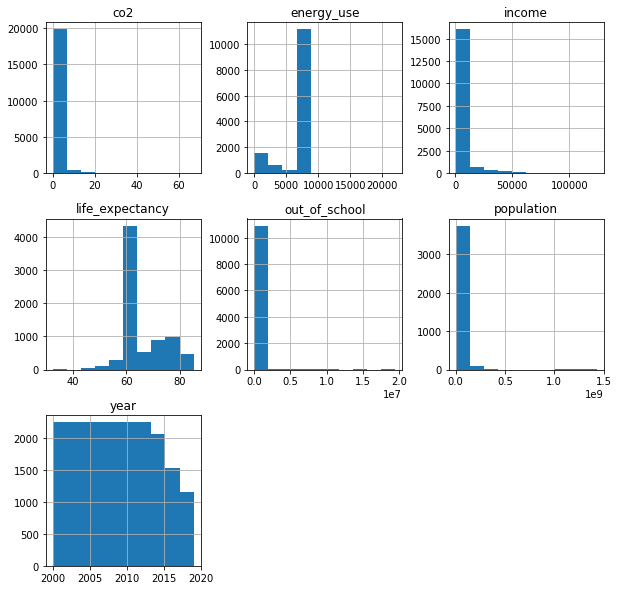

In [746]:
final_df1.hist(figsize=[10,10]);

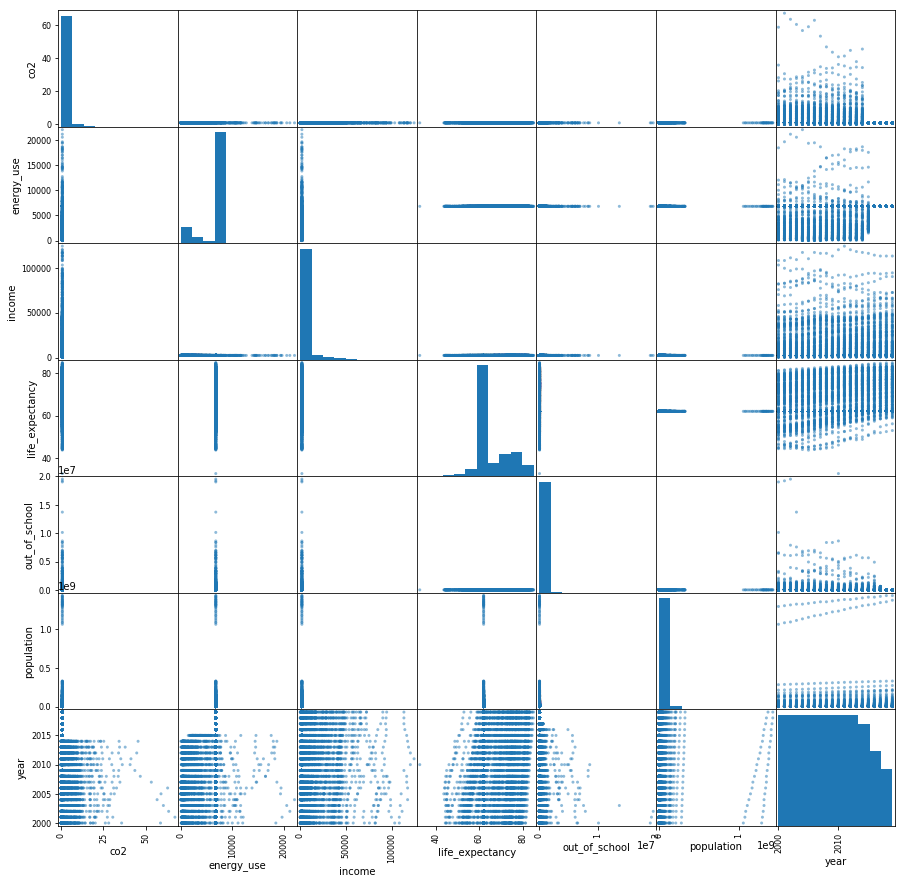

In [747]:
pd.plotting.scatter_matrix(final_df1, figsize=[15,15]);

### Q1) Which continent has the highest average population? What's the average population trend over the years?


In [748]:
population_df1 = final_df1.groupby(
    ['year','continent']).agg({
        'population': 'mean'
    }).unstack(level=1)

In [749]:
population_df1

population                                            \
continent        Africa      Americas          Asia        Europe   
year                                                                
2000       1.526526e+07  2.439311e+07  8.262698e+07  1.707912e+07   
2001       1.563978e+07  2.468513e+07  8.373418e+07  1.709866e+07   
2002       1.604217e+07  2.500221e+07  8.464961e+07  1.710706e+07   
2003       1.642785e+07  2.528989e+07  8.579559e+07  1.713524e+07   
2004       1.682523e+07  2.557474e+07  8.671986e+07  1.714726e+07   
2005       1.725039e+07  2.585950e+07  8.784393e+07  1.718718e+07   
2006       1.769673e+07  2.617573e+07  8.900482e+07  1.719692e+07   
2007       1.813274e+07  2.645172e+07  8.993239e+07  1.723717e+07   
2008       1.859331e+07  2.673566e+07  9.086623e+07  1.727123e+07   
2009       1.906603e+07  2.702021e+07  9.205307e+07  1.730536e+07   
2010       1.957614e+07  2.732644e+07  9.297320e+07  1.733534e+07   
2011       2.008519e+07  2.764102e+07  9.409084e+07  1.738818e+07   
2012       2.060250e+07  2.787760e+07  9.503336e+07  1.741722e+07   
2013       2.115812e+07  2.815449e+07  9.599909e+07  1.743952e+07   
2014       2.169770e+07  2.843816e+07  9.717327e+07  1.748353e+07   
2015       2.226613e+07  2.869179e+07  9.807405e+07  1.750822e+07   
2016       2.285158e+07  2.893719e+07  9.883507e+07  1.752860e+07   
2017       2.342776e+07  2.921176e+07  9.998127e+07  1.757214e+07   
2018       2.403206e+07  2.943360e+07  1.008672e+08  1.758967e+07   
2019       2.463109e+07  2.970779e+07  1.018079e+08  1.760361e+07   

                         
continent       Oceania  
year                     
2000       2.351153e+06  
2001       2.381291e+06  
2002       2.412153e+06  
2003       2.443108e+06  
2004       2.482668e+06  
2005       2.523019e+06  
2006       2.564272e+06  
2007       2.612596e+06  
2008       2.662529e+06  
2009       2.718765e+06  
2010       2.768608e+06  
2011       2.809915e+06  
2012       2.858777e+06  
2013       2.907731e+06  
2014       2.948854e+06  
2015       2.989662e+06  
2016       3.038854e+06  
2017       3.080531e+06  
2018       3.122500e+06  
2019       3.164485e+06

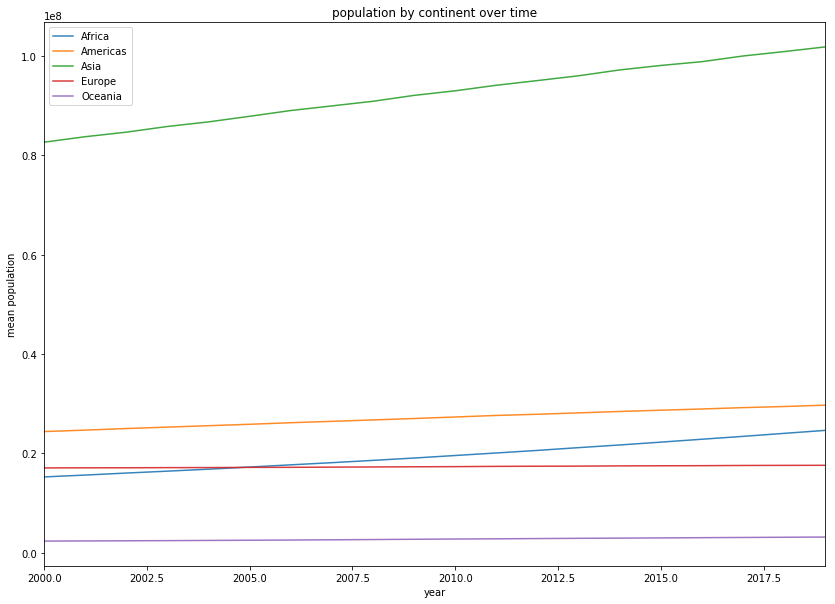

In [750]:
population_df1.plot(kind='line', alpha = 0.9, title = 'population by continent over time', figsize=[14,10])
plt.ylabel('mean population')
plt.xlabel('year')
plt.legend(labels=['Africa','Americas','Asia','Europe','Oceania'])
plt.show()

A1) We can see the higest average population is in the Asian Continent. The general population trend looks like it's increasing over time.

### Q2) Which continent earns the most on average per person? What's the average income trend over the years?

In [751]:
income_df1 = final_df1.groupby(
    ['year','continent']).agg({
        'income': 'mean'
    }).unstack(level=1)

In [752]:
income_df1

income                                                     
continent       Africa     Americas         Asia        Europe      Oceania
year                                                                       
2000       2741.243028  4405.178571  5679.894009   7624.226804  3794.237288
2001       2769.820717  4405.714286  5654.497696   7761.237113  3816.610169
2002       2785.968127  4413.154762  5682.027650   7861.907216  3848.135593
2003       2809.613546  4459.345238  5783.087558   7982.628866  3866.779661
2004       2854.900398  4548.273810  5962.119816   8199.896907  3909.322034
2005       2901.466135  4646.964286  6002.027650   8392.886598  3938.474576
2006       2935.880478  4768.571429  6152.027650   8654.381443  3942.372881
2007       2987.450199  4865.416667  6204.331797   8964.896907  3991.016949
2008       3016.888446  4916.309524  6195.944700   8977.474227  4014.745763
2009       3007.944223  4811.011905  6028.064516   8550.618557  3992.203390
2010       3019.430279  4868.035714  6130.552995   8600.515464  4025.423729
2011       2973.816733  4929.583333  6237.281106   8690.876289  4085.932203
2012       3044.541833  4979.404762  6280.691244   8640.000000  4133.559322
2013       3045.175299  5033.690476  6302.258065   8676.494845  4190.000000
2014       3040.521912  5079.464286  6319.354839   8785.103093  4278.135593
2015       3028.832669  5106.726190  6355.299539   8960.979381  4336.779661
2016       3135.575472  5803.582090  7354.171429  10685.095541  4792.040816
2017       3156.278302  5837.835821  7385.142857  10908.726115  4822.244898
2018       3429.389937  7016.930693  9081.060606  13817.416667  5749.444444
2019       3420.320755  7042.574257  9121.969697  14025.833333  5791.111111

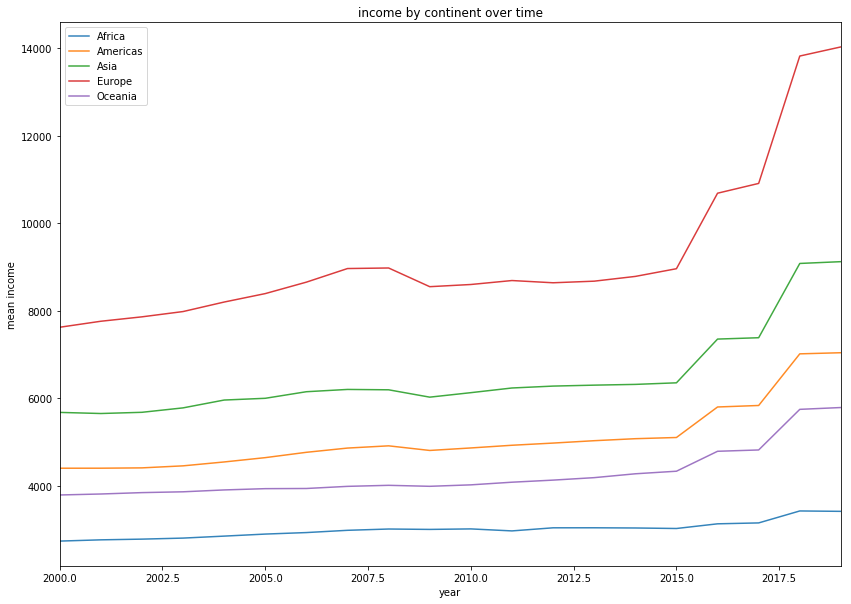

In [753]:
income_df1.plot(kind='line', alpha = 0.9, title = 'income by continent over time', figsize=[14,10])
plt.ylabel('mean income')
plt.xlabel('year')
plt.legend(labels=['Africa','Americas','Asia','Europe','Oceania'])
plt.show()

A2) We can see that Europe enjoys the highest average income per person. The general trend of income per person seems to be increasing.

### Q3) Which continent has the highest life expectancy? What's the average life expectancy trend over the years?


In [713]:
life_expectancy_df1 = final_df1.groupby(
    ['year','continent']).agg({
        'life_expectancy': 'mean'
    }).unstack(level=1)

In [714]:
life_expectancy_df1

life_expectancy                                            
continent          Africa   Americas       Asia     Europe    Oceania
year                                                                 
2000            59.165094  67.361194  65.936364  68.385000  64.086957
2001            59.312264  67.492537  66.139773  68.475000  64.147826
2002            59.421698  67.597015  66.268182  68.557500  64.178261
2003            59.562264  67.679104  66.422727  68.643750  64.208696
2004            59.758491  67.764179  66.485227  68.781250  64.260870
2005            59.992453  67.901493  66.712500  68.852500  64.308696
2006            60.275472  68.029851  66.851136  68.993750  64.356522
2007            60.561321  68.132836  67.048864  69.090000  64.382609
2008            60.862264  68.200000  67.110227  69.226250  64.443478
2009            61.141509  68.244776  67.359091  69.381250  64.317391
2010            61.489623  67.867164  67.564773  69.517500  64.586957
2011            61.666038  68.383582  67.710227  69.658750  64.643478
2012            62.169811  68.410448  67.786364  69.771250  64.721739
2013            62.475472  68.446269  67.942045  69.883750  64.813043
2014            62.712264  68.483582  67.979545  69.986250  64.856522
2015            63.050000  68.517910  68.107955  69.987500  64.917391
2016            63.342453  68.602985  68.209091  70.078750  64.991304
2017            63.582075  68.661194  68.338636  70.142500  65.278261
2018            63.774528  68.708955  68.447727  70.073125  65.841304
2019            63.945283  68.778358  68.551136  70.141875  65.910870

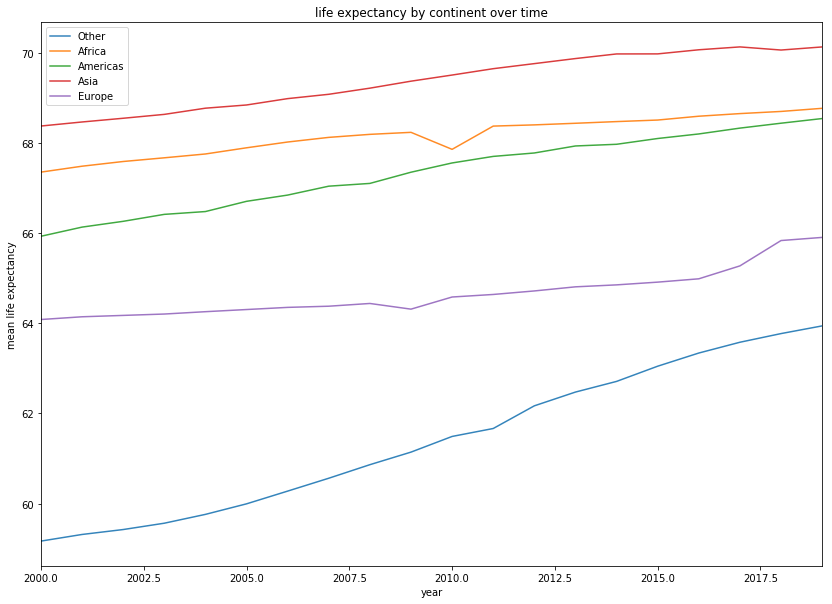

In [715]:
life_expectancy_df1.plot(kind='line', alpha = 0.9, title = 'life expectancy by continent over time', figsize=[14,10])
plt.ylabel('mean life expectancy')
plt.xlabel('year')
plt.legend(labels=['Other','Africa','Americas','Asia','Europe','Oceania'])
plt.show()

A3) We can see that Asia enjoys the highest life expectancy. We can see an increasing life expectancy across all continents.

## Conclusions and limitations

I set out to answer the following questions:

`Q1)` Which continent has the highest average population? What's the average population trend over the years?

`Q2)` Which continent earns the most on average per person? What's the average income trend over the years?

`Q3)` Which continent has the highest life expectancy? What's the average life expectancy trend over the years?

I found that:

`A1)` We can see the higest average population is in the Asian Continent. The general population trend looks like it's increasing over time.

`A2)` We can see that Europe enjoys the highest average income per person. The general trend of income per person seems to be increasing.

`A3)` We can see that Asia enjoys the highest life expectancy. We can see an increasing life expectancy across all continents.

Limitations:

`1` The dataset was filled with lots of na values. I tried to populate some of these values using the `interpolate()` function so some datapoints may not be accurate.

`2` Since I was interested in looking at continents and not specific countries, I downloaded a country->continent mapper. It looked like there was not a direct mapping between the country column in the kaggle dataset I downloaded and the Gapminder World datasets. I tried to map them using the `fuzzywuzzy` package which maps partial text with a degree of confidence. This could have caused some countries to be omitted from the dataset as I only used data that was mapped with at least 0.9 confidence as calculated by the `fuzzy_match_output` function.